In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("https://bit.ly/3EZKMUU")
data.head()

,defeat,datetime,v021,v087,v088,v089,v114,v115,v116,v117,...,v527,v528,v571,v572,v573,v574,v575,v576,v577,v578
0,normal,19/07/2008 11:55:00,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,...,0.5064,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509
1,normal,19/07/2008 12:32:00,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,...,0.8832,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003
2,defeat,19/07/2008 13:17:00,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,...,0.6451,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721
3,normal,19/07/2008 14:43:00,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,...,0.7404,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831
4,normal,19/07/2008 15:22:00,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,...,2.2181,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 54 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   defeat    1567 non-null   object 
 1   datetime  1567 non-null   object 
 2   v021      1567 non-null   float64
 3   v087      1567 non-null   float64
 4   v088      1567 non-null   float64
 5   v089      1567 non-null   float64
 6   v114      1567 non-null   float64
 7   v115      1567 non-null   float64
 8   v116      1567 non-null   float64
 9   v117      1567 non-null   float64
 10  v118      1567 non-null   float64
 11  v120      1567 non-null   float64
 12  v121      1567 non-null   float64
 13  v157      1567 non-null   float64
 14  v222      1567 non-null   float64
 15  v223      1567 non-null   float64
 16  v224      1567 non-null   float64
 17  v249      1567 non-null   float64
 18  v250      1567 non-null   float64
 19  v251      1567 non-null   float64
 20  v252      1567 non-null   floa

In [7]:
target = 'defeat'

data.drop('datetime', axis=1, inplace=True)
x = data.drop(target, axis=1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state=2022)

In [8]:
model = XGBClassifier(max_depth = 4, n_estimators=50, learning_rate=0.1)

In [9]:
model.fit(x_train, y_train)

[17:03:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\allsa\anaconda3\envs\kt-aivle\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:

model.feature_importances_

array([0.01739737, 0.01957975, 0.01428715, 0.0162514 , 0.02670237,
       0.01759297, 0.02342662, 0.02406211, 0.01735195, 0.02224962,
       0.01645445, 0.02001547, 0.02174352, 0.02194449, 0.01132895,
       0.02792332, 0.        , 0.01154135, 0.01689753, 0.02435671,
       0.02060857, 0.01849868, 0.02222427, 0.01647287, 0.02847588,
       0.03316666, 0.02999183, 0.        , 0.025023  , 0.        ,
       0.02384351, 0.01272227, 0.01452579, 0.02475785, 0.02021942,
       0.01621609, 0.02489281, 0.0105055 , 0.        , 0.03287369,
       0.0181737 , 0.01956094, 0.01819862, 0.02065217, 0.02490119,
       0.02617865, 0.02214654, 0.02419339, 0.01611208, 0.0239689 ,
       0.01852826, 0.02125984], dtype=float32)

In [13]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

,feature_names,feature_importance
0,v362,0.033167
1,v523,0.032874
2,v387,0.029992
3,v361,0.028476
4,v249,0.027923
5,v114,0.026702
6,v572,0.026179
7,v389,0.025023
8,v571,0.024901
9,v496,0.024893


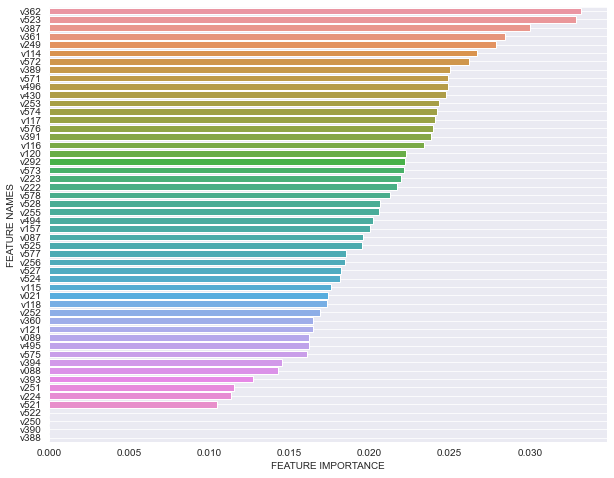

In [14]:
plot_feature_importance(model.feature_importances_, x.columns)